![University Logo](../Durham_University.svg)

# Introduction into matplotlib.pyplot

In [1]:
# Import Matplotlib and NumPy
import matplotlib.pyplot as plt
import numpy as np

## Using Matplotlib pyplot
For quick plotting we can directly use the matplotlib.pyplot functions. The different available plots can be found in the [Matplotlib documentation](https://matplotlib.org/stable/plot_types/index.html).

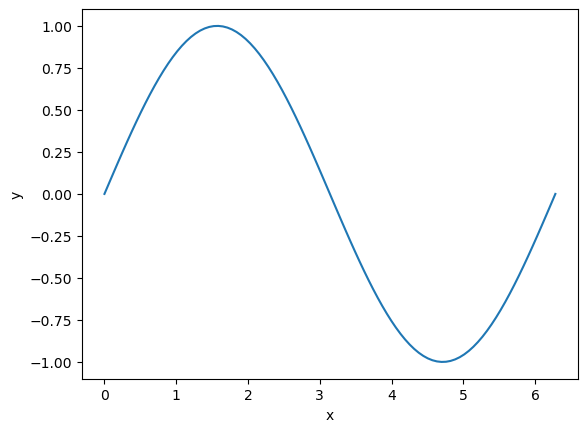

In [2]:
# Create data for plotting pi between 0 and 2*pi
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Create a simple plot of a sin function using plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Usually I would always use subplots
Still, the different available plots can be found in the [matplotlib documentation](https://matplotlib.org/stable/plot_types/index.html).

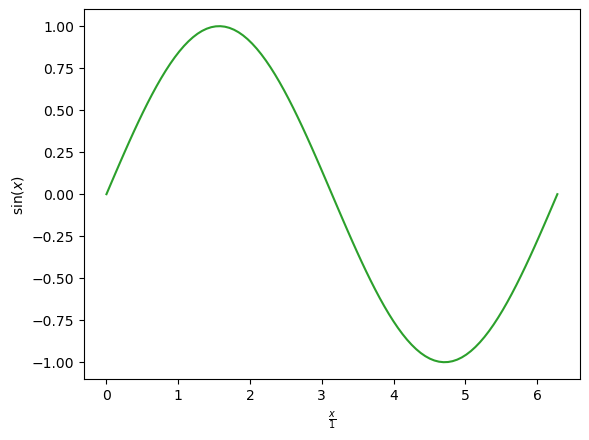

In [3]:
# Create the same plot using fig and ax
fig, ax = plt.subplots()

ax.plot(x, y, color='C2')
ax.set_xlabel(r'$\frac{x}{1}$')
ax.set_ylabel(r'$\sin(x)$')

plt.show()


Speaker notes:
 - Show more complex LaTex equation
 - Show colors
  - by name, e.g. 'blue'
  - by Hexcode, e.g. '#123456'
  - by colour scheme colour, e.g. 'C1'

## If there are multiple plots, using subplots is usually the better idea

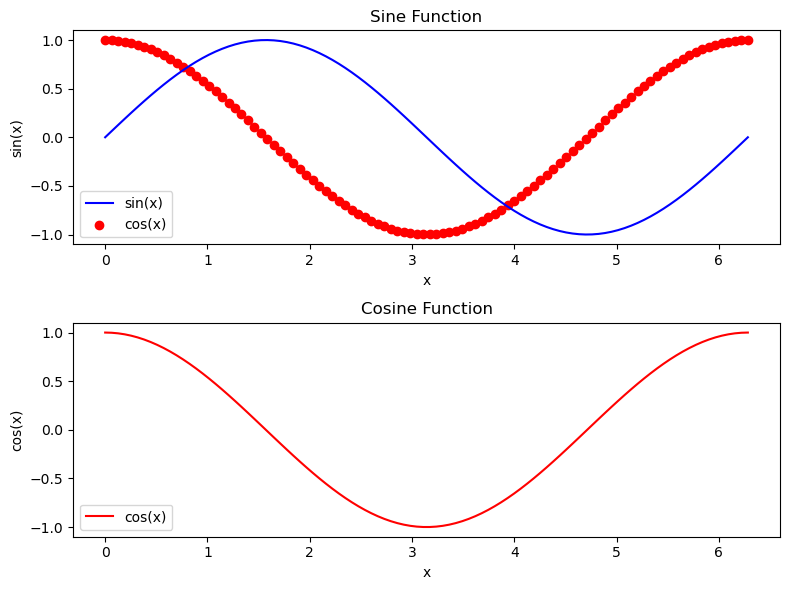

In [4]:
# Create data for plotting the sin and cose as multiple plots in 0 to 2*pi
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot the data on the subplots
axs[0].plot(x, y1, color='blue', label='sin(x)')
axs[0].scatter(x, y2, color='red', label='cos(x)')
axs[1].plot(x, y2, color='red', label='cos(x)')

# Set titles and labels for each subplot
axs[0].set_title('Sine Function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('sin(x)')
axs[1].set_title('Cosine Function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('cos(x)')

# Add legends to the subplots
axs[0].legend()
axs[1].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


Speaker Notes:
 - Also demonstrate multiple plots in one subplot

# _Exercise 1 (see the exercises notebook)_

# Encoding information
We can encode information in different ways. The three ways are: position, [color](https://matplotlib.org/stable/users/explain/colors/colormaps.html) and size.

In [5]:
# Generate random data
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)


/home/dmitry/miniconda3/envs/teaching_data_analysis/lib/python3.13/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


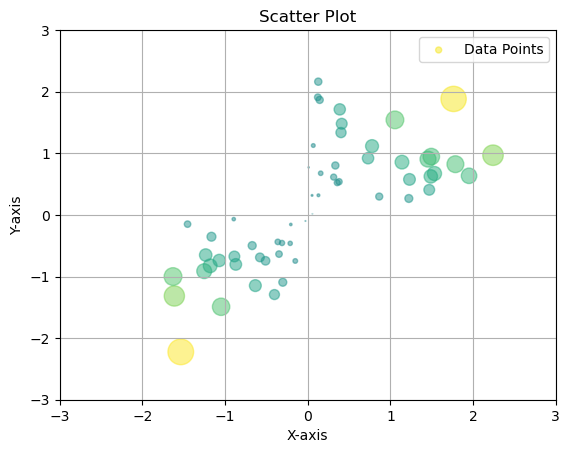

In [6]:

# Create a scatter plot, use colour and size for encoding
fig, ax = plt.subplots()
ax.scatter(
    x, y, c=x * y* 100, marker='o',
    s=x * y* 100,
    alpha=0.5
)

# Set plot title and labels
ax.set_title('Scatter Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Customize plot appearance using grid and legend
ax.grid(True)
ax.legend(['Data Points'])
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# Show the plot
plt.show()

# Plotting categorical data

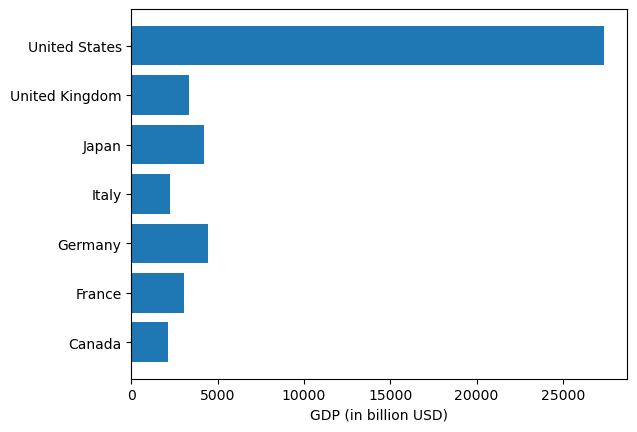

In [7]:
country, gdp = np.loadtxt(
    '../Data/presentation/GDP_G7.csv',
    unpack=True,
    dtype='<U15,float64',
    delimiter=','
)

# Create fig and ax
fig, ax = plt.subplots()

# Create a bar plot
# ax.bar(country, gdp)

# Set xticklabel, including rotation
# ax.set_xticklabels(country, rotation=90)

# Demonstrate horizontal bar plot
ax.barh(country, gdp)

ax.set_xlabel('GDP (in billion USD)')
plt.show()

Speaker Notes:
 - Labels usually get very long, we can rotate them
 - Usually the nicer option is a horizontal bar chart.

## If there is no inherent reason to sort data in a certain way, sort by size

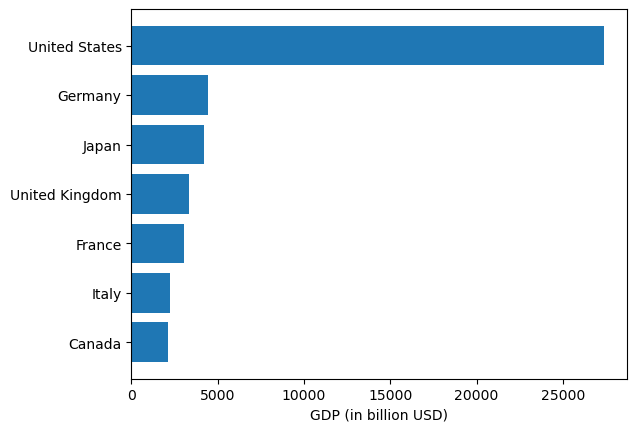

In [8]:
# Create indexes for sorting the arrays
indexes = np.argsort(gdp)

# Create sorted horizontal bar plot
fig, ax = plt.subplots()
ax.barh(country[indexes], gdp[indexes])
ax.set_xlabel('GDP (in billion USD)')
plt.show()

## We can also set styles using an mplstyle file

Why use a style file, if we can just copy options:
 - We can replot a graph for different purposes (talk, paper, grant application, thesis...).
 - If we have multiple notebooks for one paper, it is still easy to keep a consistent style and not forget to copy a redesign to "that one" graph.
 - Our notebooks will be less messy.

## There are different levels to applying a style
Applies globally to all following plots, but we can also apply colors to the individual values.

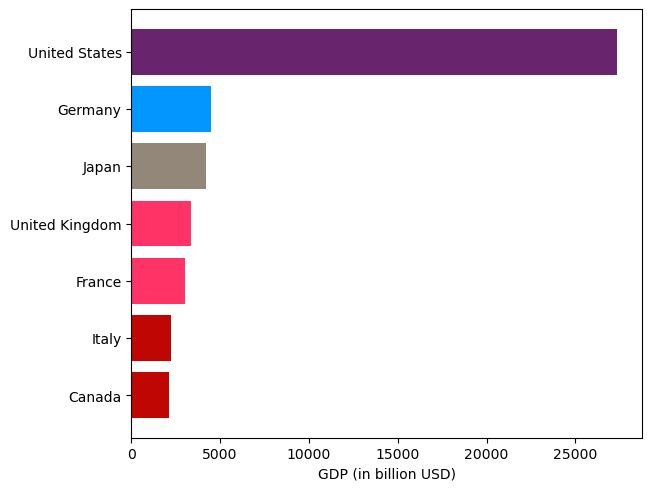

In [9]:
plt.style.use('../mpl_styles/colors.mplstyle')

colors = ['C1', 'C1', 'C2', 'C2', 'C3', 'C4', 'C5']

fig, ax = plt.subplots()
ax.barh(country[indexes], gdp[indexes], color=colors)
ax.set_xlabel('GDP (in billion USD)')
plt.show()

# Apply to the plots in a context manager

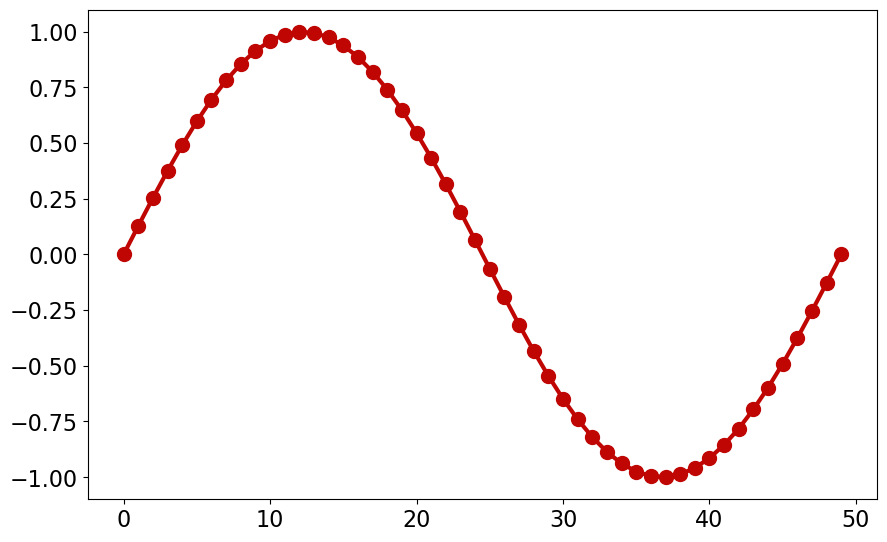

In [10]:
with plt.style.context(('../mpl_styles/presentation.mplstyle')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'C1-o')

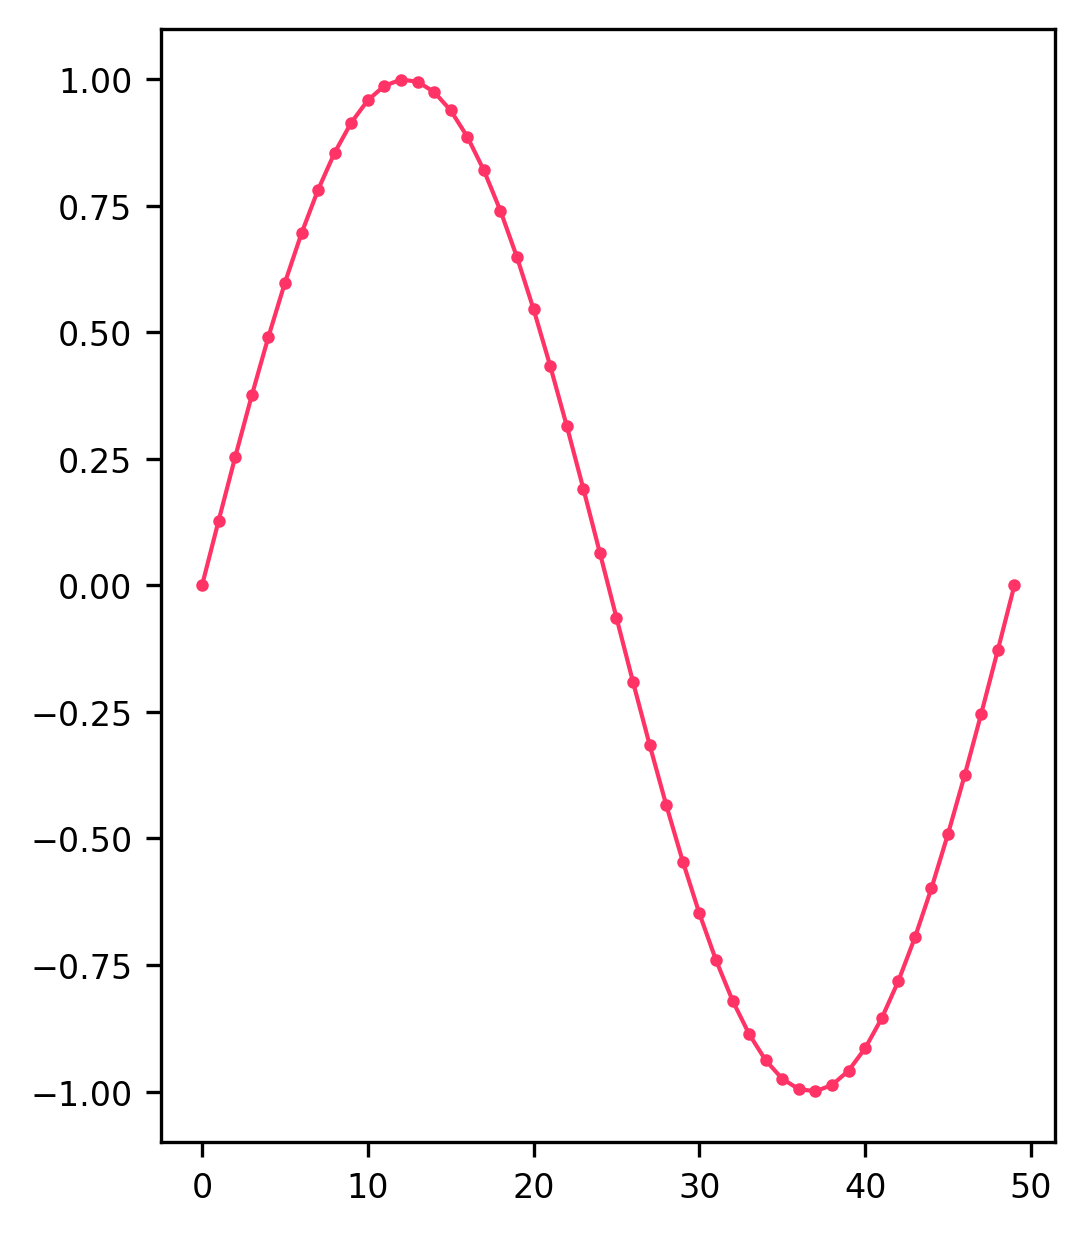

In [11]:
with plt.style.context((
    '../mpl_styles/publication.mplstyle',
    '../mpl_styles/publication_onecolumn.mplstyle')
):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'C2-o')

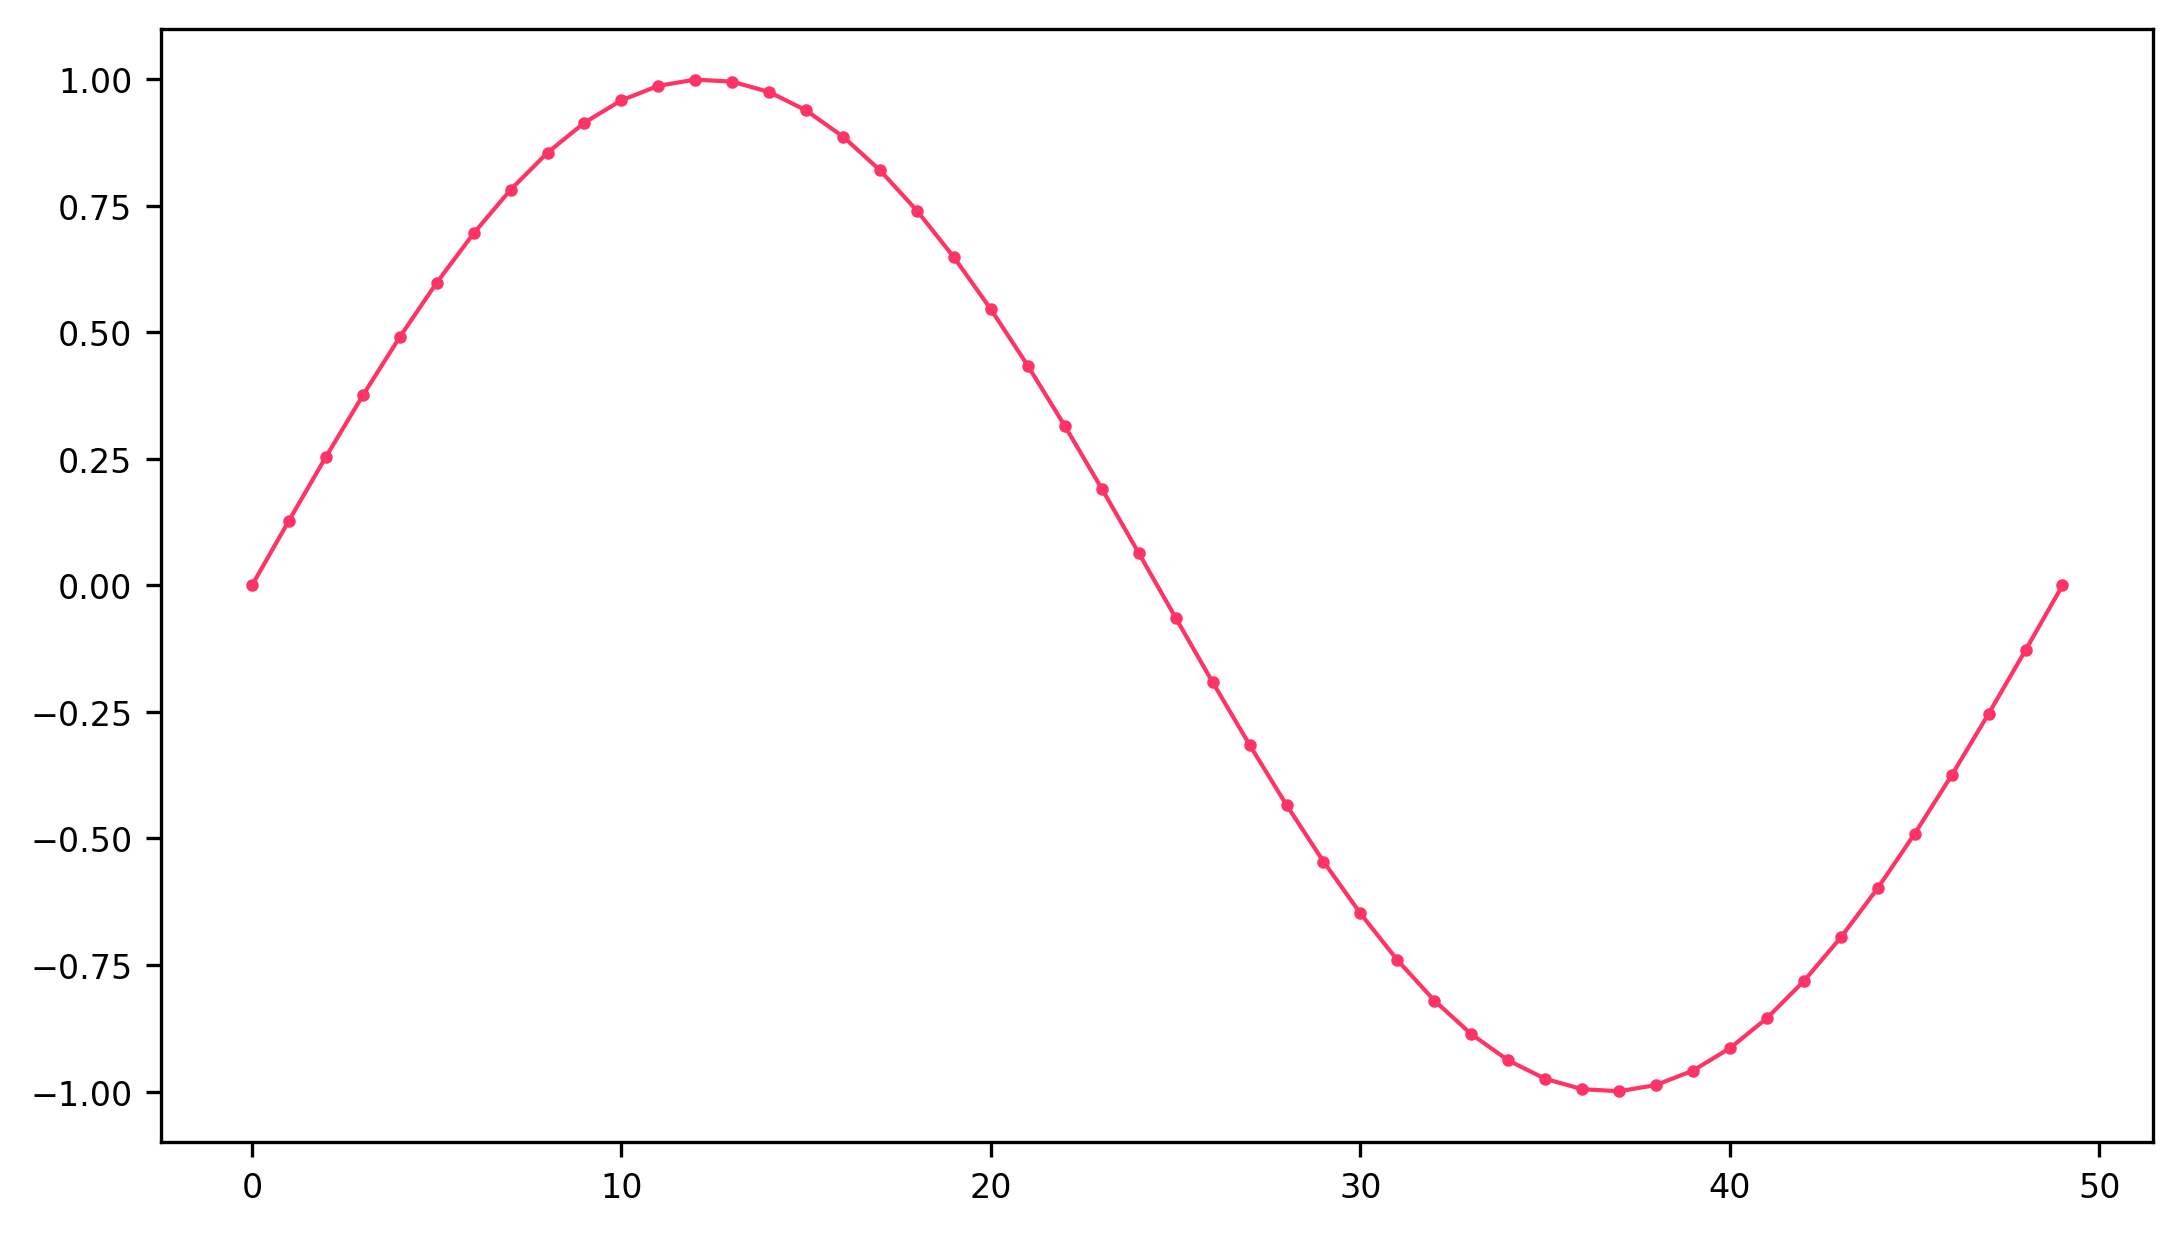

In [12]:
with plt.style.context((
    '../mpl_styles/publication.mplstyle',
    '../mpl_styles/publication_twocolumn.mplstyle'
)):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'C2-o')

# _Exercise 2 (see the exercises notebook)_

# Exporting figures
Matplotlib figures can be exported using the savefig command. Standard available formats are: PNG, PDF, PS, EPS and SVG.

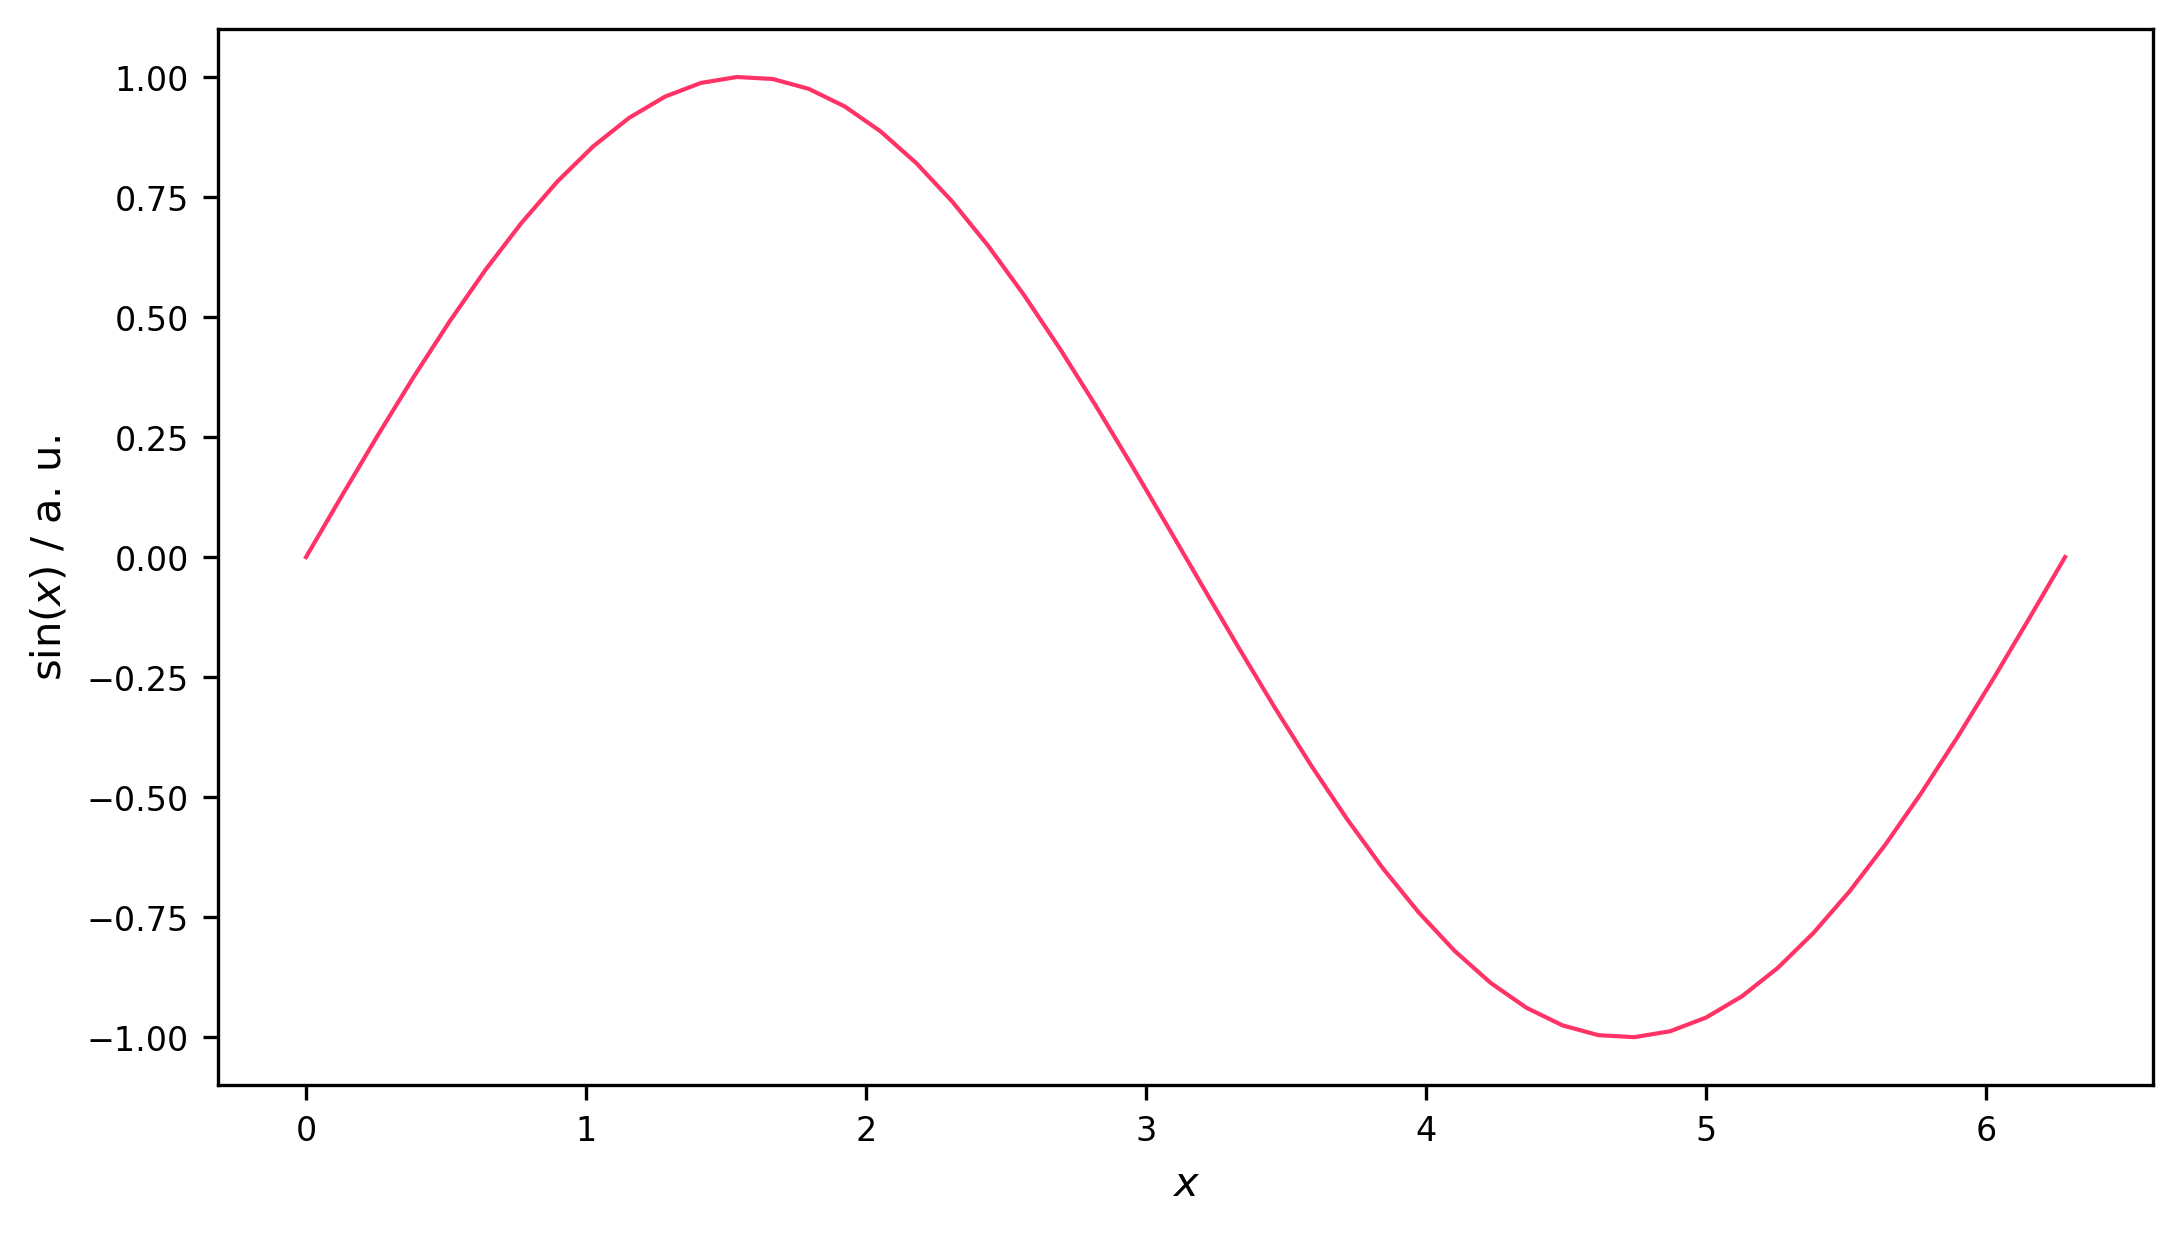

In [13]:
with plt.style.context((
    '../mpl_styles/publication.mplstyle',
    '../mpl_styles/publication_twocolumn.mplstyle'
)):
    fig, ax = plt.subplots()
    x = np.linspace(0, 2 * np.pi)
    ax.plot(x, np.sin(x), 'C2')
    ax.set_xlabel('$x$')
    ax.set_ylabel(r'$\sin(x)$ / a. u.')

    fig.savefig('matplotlib_output.svg')

Speaker notes
 - If not set by a style or in the figure creation you should set the dpi value here
 - If some of your output is cropped, try `bbox_inches='tight'`

# Summary:
 - Matplotlib can be used to generate plots
 - We can style these plots using mplstyle files
 - Adapt your figures to your use case